In [ ]:
%matplotlib inline

import numpy as np
import matplotlib.pylab as plt
from google.colab import files, drive    # upload
drive.mount('drive')

Drive already mounted at drive; to attempt to forcibly remount, call drive.mount("drive", force_remount=True).


In [ ]:
DIR = "/content/drive/MyDrive/coding/Curve Fitting/functions"

In [ ]:
simple_data = np.load(DIR+'/simple-linear.npy')
complex_data = np.load(DIR+'/complex-linear.npy')
x = np.linspace(-20, 20, num=20*2+1, endpoint=True)

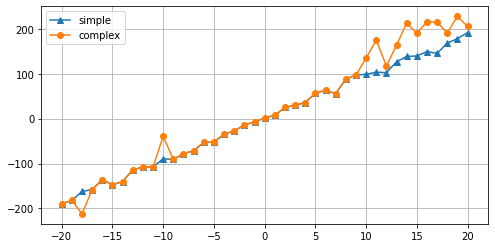

In [ ]:
fig = plt.figure(figsize=[8, 4])
plt.plot(x, simple_data, label="simple", marker='^')
plt.plot(x, complex_data, label="complex", marker='o')
plt.grid('on')
plt.legend()

In [ ]:
def linear_least_squares(x, y):
  X = np.array([np.array([i, 1]) for i in x])
  A = (X.transpose()).dot(X)
  A = np.linalg.inv(A)
  B = (X.transpose()).dot(y)
  model = A.dot(B)
  return model[0], model[1]

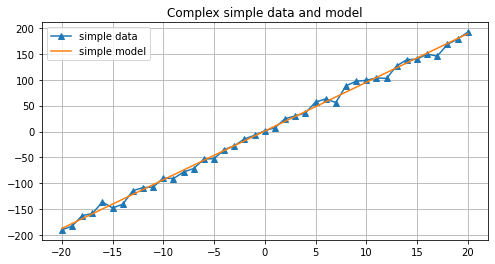

In [ ]:
model_simple = linear_least_squares(x, simple_data)
model_simple_plot = model_simple[0] * x + model_simple[1]
fig = plt.figure(figsize=[8, 4])
plt.plot(x, simple_data, label="simple data", marker='^')
plt.plot(x, model_simple_plot, label="simple model")
plt.grid('on')
plt.title("Complex simple data and model")
plt.legend()

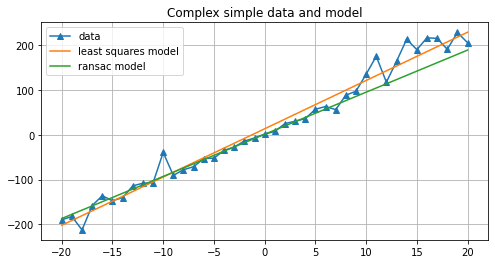

In [ ]:
complex_model = linear_least_squares(x, complex_data)
complex_model_plot = complex_model[0] * x + complex_model[1]
fig = plt.figure(figsize=[8, 4])
plt.plot(x, complex_data, label="data", marker='^')
plt.plot(x, complex_model_plot, label="least squares model")
plt.plot(x, model_simple_plot, label ="ransac model")
plt.grid('on')
plt.title("Complex simple data and model")
plt.legend()

No handles with labels found to put in legend.


avg:  10000000000          best_m:  100000000          best_b:  100000000


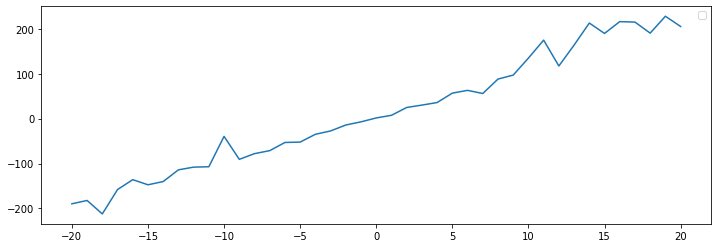

In [ ]:
fig = plt.figure(figsize = [12, 4])
inlier_percentage = 0.75
min_inlier = inlier_percentage * x.size
error_max = 20
inlier_model = False
best_error = 10000000000
best_m = 100000000
best_b = 100000000
for i in range(1, 61):
  
  if inlier_model:
    xind = np.array([x[i] for i in inlier_inds])
    yind = np.array([complex_data[i] for i in inlier_inds])
    m, b = linear_least_squares(xind, yind)
  else:
    ind1 = np.random.randint(0, x.size)
    ind2 = np.random.randint(0, x.size)
    if ind1 == ind2:
      continue
    m, b = linear_least_squares(np.array([x[ind1], x[ind2]]), np.array([complex_data[ind1], complex_data[ind2]]))
  inliers = 0
  inlier_inds = []
  error = 0

  for a in range(x.size):
    diff = np.abs(complex_data[a] - m * x[a] + b)
    if diff <= error_max:
      inliers += 1
      inlier_inds.append(a)
      error += diff
  if inliers >= min_inlier:
    av_error = error/inliers
    inlier_model = True
    plt.plot(x, m*x+b, label = 'itr = {0}, m = {1:2.2f}, b = {2:2.2f}'.format(i, m, b))
    if av_error < best_error:
      best_error = av_error
      best_m = m
      best_b = b

  else:
    inlier_model = False
plt.plot(x, complex_data)
plt.legend()
plt.grid
print("avg: ", best_error, "         best_m: ", best_m, "         best_b: ", best_b)